In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline



In [5]:
from google.colab import files
uploaded = files.upload()


Saving fraud_oracle.csv to fraud_oracle.csv


In [ ]:
import pandas as pd

# Adjust the path below if your file is located in a different directory
df = pd.read_csv('/content/fraud_oracle[1].csv')

# Now define your categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.drop('FraudFound_P').tolist()


In [ ]:
# Splitting the dataset into training and testing sets
X = df.drop('FraudFound_P', axis=1)  # Features
y = df['FraudFound_P']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Define your categorical and numerical features here
categorical_features = ...
numerical_features = ...

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Combine preprocessing and SMOTE with logistic regression in a pipeline
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])


In [ ]:
print(X_train.columns)  # Print current columns to verify their names

# Assuming 'numerical_features' and 'categorical_features' are defined based on 'X_train'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),  # Ensure these are in 'X_train'
        ('cat', categorical_pipeline, categorical_features)  # Ensure these are in 'X_train'
    ])


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [ ]:
print(X_train.columns)


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [ ]:
# Assuming 'df' is your DataFrame and 'FraudFound_P' is the target variable
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object', 'bool']).columns.drop('FraudFound_P').tolist()


In [ ]:
# Check for the existence of specified columns in X_train
all_columns = set(numerical_features + categorical_features)
existing_columns = set(X_train.columns)
missing_columns = all_columns - existing_columns
print("Missing columns:", missing_columns)


Missing columns: set()


In [ ]:
print(X_train.columns)


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [ ]:
# Example of a simplified ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), [numerical_features[0]])])


In [ ]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.drop('FraudFound_P').tolist()

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Combine preprocessing and SMOTE with logistic regression in a pipeline
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])


In [ ]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['WeekOfMonth',
                                                   'WeekOfMonthClaimed', 'Age',
                                                   'PolicyNumber', 'RepNumber',
                                                   'Deductible', 'DriverRating',
                                                   'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'DayOfWeek', 'Make',
                                                   'AccidentArea',
                                                   'DayOfWee...
                                                   'VehicleCategory',
                                                   'VehiclePrice',
                                                   'Days_Policy_Accident',
                                                   'Days_Policy_Claim',
                                                   'PastNumberOfClaims',
                                                   'AgeOfVehicle',
                                                   'AgeOfPolicyHolder',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent',
                                                   'AgentType',
                                                   'NumberOfSuppliments',
                                                   'AddressChange_Claim',
                                                   'NumberOfCars',
                                                   'BasePolicy'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])}")


              precision    recall  f1-score   support

           0       0.98      0.67      0.80      2887
           1       0.14      0.80      0.24       197

    accuracy                           0.68      3084
   macro avg       0.56      0.74      0.52      3084
weighted avg       0.93      0.68      0.76      3084

ROC-AUC Score: 0.8103910581127722


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'model_pipeline' is your complete pipeline ending with the logistic regression model
# and 'X' and 'y' are your features and target variable respectively.

# Define custom scorers if necessary, particularly for imbalanced datasets
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label=1),  # Assuming 1 is the positive class for fraud
    'recall': make_scorer(recall_score, pos_label=1),
    'f1_score': make_scorer(f1_score, pos_label=1),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and store results
cv_results = {}
for score_name, scorer in scorers.items():
    scores = cross_val_score(model_pipeline, X, y, scoring=scorer, cv=5)  # 5-fold cross-validation
    cv_results[score_name] = scores

# Print the results
for score_name, scores in cv_results.items():
    print(f"{score_name}: Mean = {scores.mean():.4f}, Standard Deviation = {scores.std():.4f}")


accuracy: Mean = 0.6933, Standard Deviation = 0.0347
precision: Mean = 0.1028, Standard Deviation = 0.0097
recall: Mean = 0.5421, Standard Deviation = 0.1357
f1_score: Mean = 0.1722, Standard Deviation = 0.0200
roc_auc: Mean = 0.7193, Standard Deviation = 0.0212


In [ ]:
import numpy as np

# Assuming your pipeline is named 'model_pipeline' and it has been fitted
# Extract the fitted model from the pipeline
logreg_model = model_pipeline.named_steps['classifier']

# If you used a ColumnTransformer for preprocessing, extract feature names
preprocessor = model_pipeline.named_steps['preprocessor']
feature_names_transformed = preprocessor.transformers_[0][1].get_feature_names_out()

# Combining feature names for categorical and numerical features after transformation
all_feature_names = np.concatenate([feature_names_transformed, numerical_features])

# Extract coefficients
coefficients = logreg_model.coef_[0]

# Pair feature names with coefficients
feature_importance = zip(all_feature_names, coefficients)


In [ ]:
# Sort features by their absolute coefficients (importance)
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted features and their coefficients
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")


Deductible: -0.5413
Year: 0.4747
WeekOfMonth: -0.2206
WeekOfMonthClaimed: -0.1757
Age: -0.1537
DriverRating: 0.1524
RepNumber: 0.1298
Age: -0.0931
PolicyNumber: 0.0832
WeekOfMonth: -0.0612
WeekOfMonthClaimed: 0.0470
Year: -0.0429
PolicyNumber: -0.0132
Deductible: 0.0129
RepNumber: 0.0030
DriverRating: -0.0001


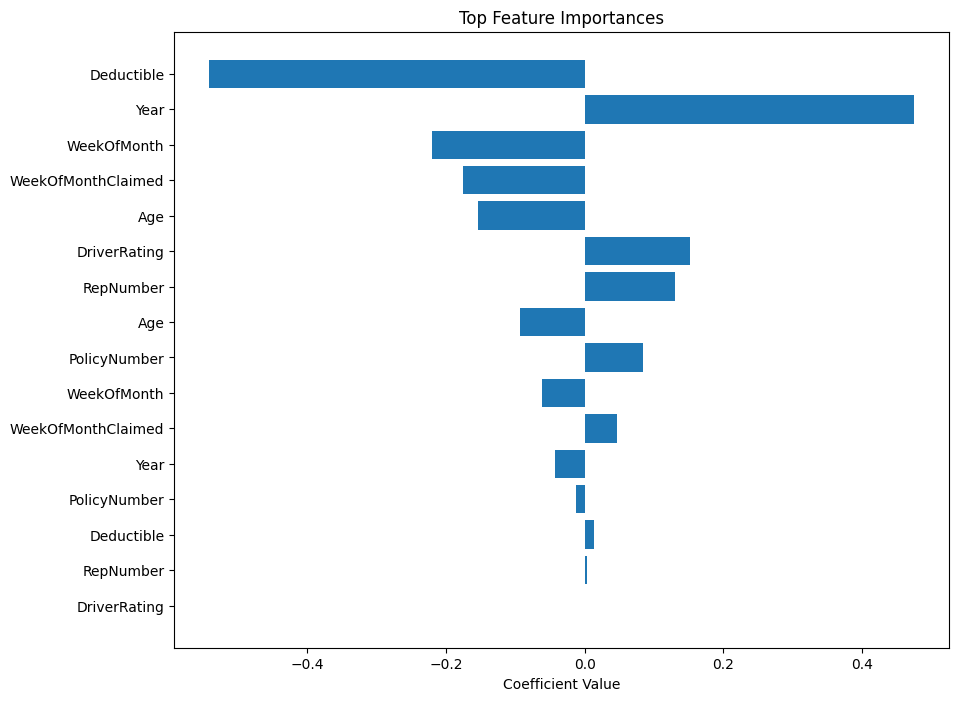

In [ ]:
import matplotlib.pyplot as plt

# Get the top N features (for clarity in visualization)
top_n = 20
top_features = sorted_features[:top_n]
features, coefs = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), coefs, align='center')
plt.yticks(range(len(features)), features)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.xlabel('Coefficient Value')
plt.title('Top Feature Importances')
plt.show()


In [ ]:
# Assuming model_pipeline is your fitted model pipeline
# and X_test is your test dataset
y_prob = model_pipeline.predict_proba(X_test)


In [ ]:
import pandas as pd

# Assuming y_test and y_pred are defined, as are the probabilities y_prob
predictions_df = pd.DataFrame({
    'true_labels': y_test,
    'predicted_labels': y_pred,
    'probability': y_prob[:, 1]  # Assuming the second column represents the probability of the positive class
})

# Optionally, add other features from X_test for deeper analysis
predictions_df = predictions_df.join(X_test.reset_index(drop=True))


In [ ]:
false_positives = predictions_df[(predictions_df['predicted_labels'] == 1) & (predictions_df['true_labels'] == 0)]
false_negatives = predictions_df[(predictions_df['predicted_labels'] == 0) & (predictions_df['true_labels'] == 1)]


In [ ]:
print("False Positives Analysis")
print(false_positives.describe())
# You might want to look at specific features that are common in these errors


False Positives Analysis
       true_labels  predicted_labels  probability  WeekOfMonth  \
count        949.0             949.0   949.000000   210.000000   
mean           0.0               1.0     0.699275     2.871429   
std            0.0               0.0     0.110721     1.270814   
min            0.0               1.0     0.500633     1.000000   
25%            0.0               1.0     0.607417     2.000000   
50%            0.0               1.0     0.702337     3.000000   
75%            0.0               1.0     0.777203     4.000000   
max            0.0               1.0     0.994691     5.000000   

       WeekOfMonthClaimed         Age  PolicyNumber   RepNumber  Deductible  \
count          210.000000  210.000000    210.000000  210.000000  210.000000   
mean             2.738095   38.733333   7622.695238    8.452381  401.428571   
std              1.302547   13.882119   4651.236998    4.704688   11.894961   
min              1.000000    0.000000     47.000000    1.000000 

In [ ]:
print("False Negatives Analysis")
print(false_negatives.describe())
# Analyze specific features or conditions that were overlooked


False Negatives Analysis
       true_labels  predicted_labels  probability  WeekOfMonth  \
count         39.0              39.0    39.000000     5.000000   
mean           1.0               0.0     0.355716     2.800000   
std            0.0               0.0     0.126556     0.447214   
min            1.0               0.0     0.059674     2.000000   
25%            1.0               0.0     0.306808     3.000000   
50%            1.0               0.0     0.398591     3.000000   
75%            1.0               0.0     0.448183     3.000000   
max            1.0               0.0     0.480460     3.000000   

       WeekOfMonthClaimed        Age  PolicyNumber  RepNumber  Deductible  \
count            5.000000   5.000000      5.000000    5.00000         5.0   
mean             3.000000  37.200000   7747.600000    6.80000       400.0   
std              1.224745  12.275993   6505.580243    3.34664         0.0   
min              1.000000  26.000000    182.000000    3.00000       400.

In [ ]:
print(false_positives.columns)


Index(['true_labels', 'predicted_labels', 'probability', 'Month',
       'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age',
       'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')


In [ ]:
print(false_positives.columns)


Index(['true_labels', 'predicted_labels', 'probability', 'Month',
       'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age',
       'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')


Text(0, 0.5, 'Frequency')

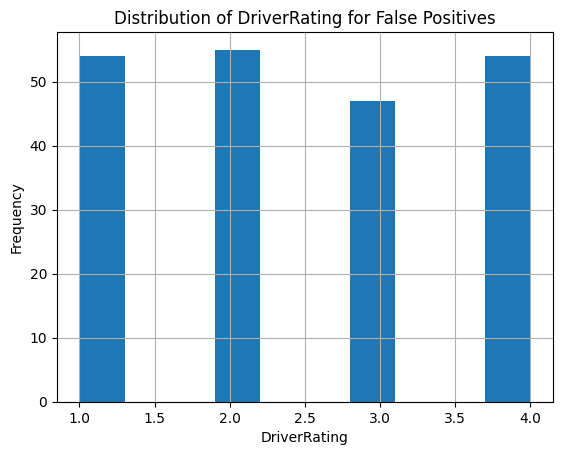

In [ ]:
# Assuming 'false_positives' has been correctly identified previously
false_positives['DriverRating'].hist()
plt.title('Distribution of DriverRating for False Positives')
plt.xlabel('DriverRating')
plt.ylabel('Frequency')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Chevrolet'),
  Text(1, 0, 'Pontiac'),
  Text(2, 0, 'Accura'),
  Text(3, 0, 'Toyota'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Mazda'),
  Text(6, 0, 'Saturn'),
  Text(7, 0, 'Ford'),
  Text(8, 0, 'Dodge'),
  Text(9, 0, 'VW'),
  Text(10, 0, 'Mercury')])

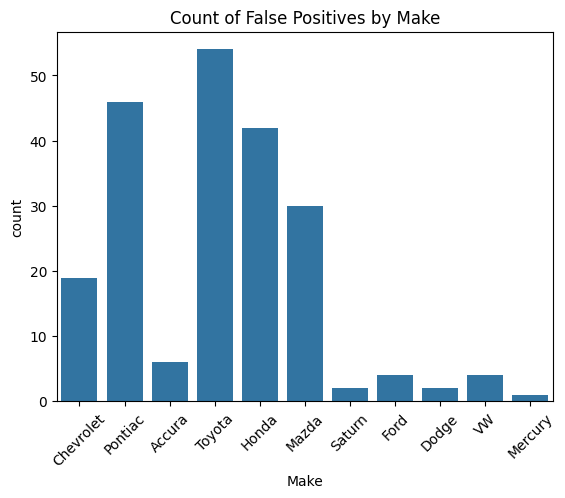

In [ ]:
import seaborn as sns

# Assuming 'false_positives' has been correctly identified previously
sns.countplot(data=false_positives, x='Make')
plt.title('Count of False Positives by Make')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
# Define the dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Fit the dummy classifier
dummy_clf.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

In [ ]:
# Predictions with the dummy classifier
y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluation
print("Dummy Classifier's Classification Report:")
print(classification_report(y_test, y_pred_dummy))
print("Dummy Classifier's ROC-AUC Score:", roc_auc_score(y_test, y_prob_dummy))


Dummy Classifier's Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

Dummy Classifier's ROC-AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns (based on your provided lists)
categorical_cols = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Define transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a preprocessing and modeling pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))
])


In [ ]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Fit the model pipeline
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['WeekOfMonth',
                                                   'WeekOfMonthClaimed', 'Age',
                                                   'PolicyNumber', 'RepNumber',
                                                   'Deductible', 'DriverRating',
                                                   'Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'DayOfWeek', 'Make',
                                                   'AccidentArea',
                                                   'DayOfWeekClaimed',
                                                   'MonthClaimed', 'Sex',
                                                   'MaritalStatus', 'Fault',
                                                   'PolicyType',
                                                   'VehicleCategory',
                                                   'VehiclePrice',
                                                   'Days_Policy_Accident',
                                                   'Days_Policy_Claim',
                                                   'PastNumberOfClaims',
                                                   'AgeOfVehicle',
                                                   'AgeOfPolicyHolder',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent',
                                                   'AgentType',
                                                   'NumberOfSuppliments',
                                                   'AddressChange_Claim',
                                                   'NumberOfCars',
                                                   'BasePolicy'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Making predictions
y_pred_tree = model_pipeline.predict(X_test)
y_prob_tree = model_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Simple Decision Tree's Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Simple Decision Tree's ROC-AUC Score:", roc_auc_score(y_test, y_prob_tree))


Simple Decision Tree's Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.53      0.05      0.08       197

    accuracy                           0.94      3084
   macro avg       0.73      0.52      0.53      3084
weighted avg       0.91      0.94      0.91      3084

Simple Decision Tree's ROC-AUC Score: 0.8220923833252161


In [ ]:
import time


In [ ]:
# Simulate increasing data volumes by creating larger subsets of your data
from sklearn.utils import resample

# Example: Check model training time on increasing data sizes
for fraction in [0.1, 0.5, 1.0]:  # Simulate smaller to full dataset
    sample_X, sample_y = resample(X_train, y_train, n_samples=int(fraction * len(y_train)), random_state=42)

    start_time = time.time()
    model_pipeline.fit(sample_X, sample_y)
    end_time = time.time()

    print(f"Training time for {fraction*100}% of data: {end_time - start_time:.4f} seconds")


Training time for 10.0% of data: 0.0312 seconds
Training time for 50.0% of data: 0.0761 seconds
Training time for 100.0% of data: 0.1417 seconds


In [ ]:
import time

# Measure prediction time
start_time = time.time()
predictions = model_pipeline.predict(X_test)
end_time = time.time()

print(f"Prediction time for {len(X_test)} instances: {end_time - start_time:.4f} seconds")


Prediction time for 3084 instances: 0.0605 seconds


In [ ]:
# Placeholder for a monitoring setup - This part is more conceptual
# Example: Periodically re-evaluate model performance on a recent dataset
# This could be set up as a scheduled job (using Airflow, cron, etc.)

def evaluate_model_performance(model, X_recent, y_recent):
    predictions_recent = model.predict(X_recent)
    performance_metric = accuracy_score(y_recent, predictions_recent)  # Choose your metric
    print(f"Recent performance metric: {performance_metric}")
    # Here, you could compare recent performance with historical performance and alert if below threshold


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter ranges
param_grid = {'classifier__max_depth': [3, 5, 10],
              'classifier__min_samples_split': [2, 5, 10]}

# Instantiate the grid search
grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model found by the grid search
y_pred_gs = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_gs))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter ranges
param_grid = {'classifier__max_depth': [3, 5, 10],
              'classifier__min_samples_split': [2, 5, 10]}

# Instantiate the grid search
grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model found by the grid search
y_pred_gs = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_gs))


Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.05      0.09       197

    accuracy                           0.94      3084
   macro avg       0.97      0.52      0.53      3084
weighted avg       0.94      0.94      0.91      3084



In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the updated model using cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.28891051 0.9419585  0.94066148 0.9419585  0.93904021]
Mean CV score: 0.8105058365758756


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


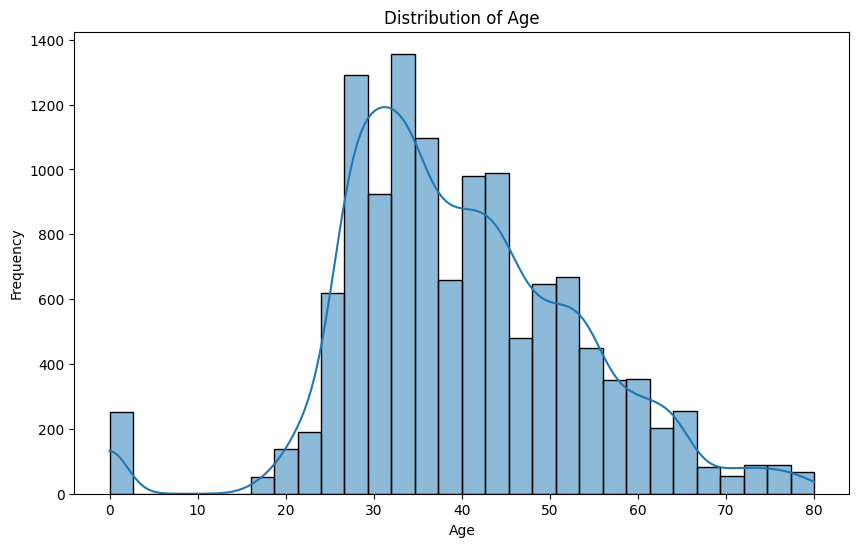

In [ ]:
# Example: Plotting a histogram for the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='Age', bins=30, kde=True)  # KDE=True adds a density estimate
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


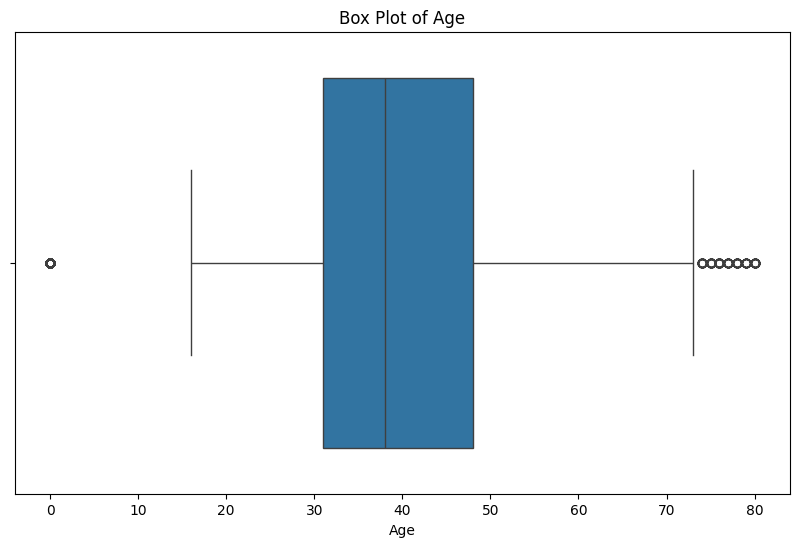

In [ ]:
# Example: Box plot for 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


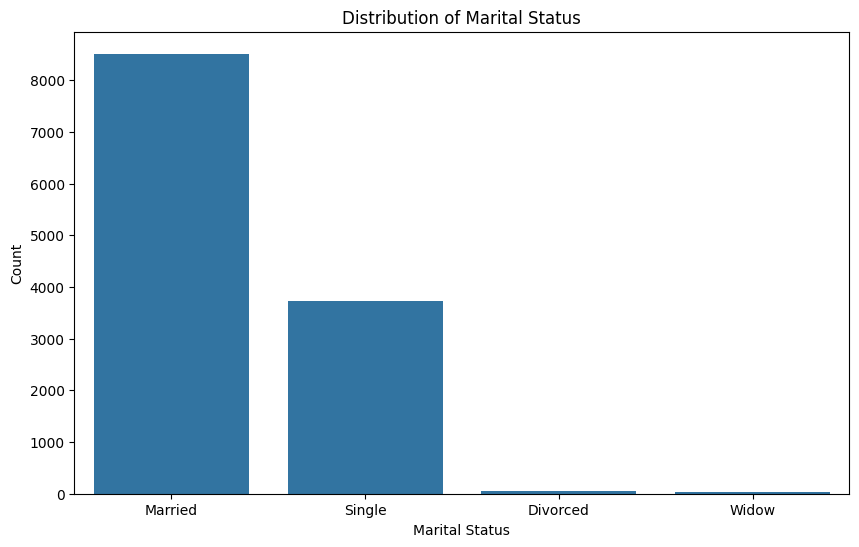

In [ ]:
# Example: Bar chart for 'MaritalStatus'
plt.figure(figsize=(10, 6))
sns.countplot(data=X_train, x='MaritalStatus')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


In [ ]:
# Assuming y_train is a Series or a single-column DataFrame
# Make sure y_train's index aligns with X_train if it's not in sequence or has been shuffled
temp_df = X_train.copy()
temp_df['FraudFound_P'] = y_train.reset_index(drop=True)


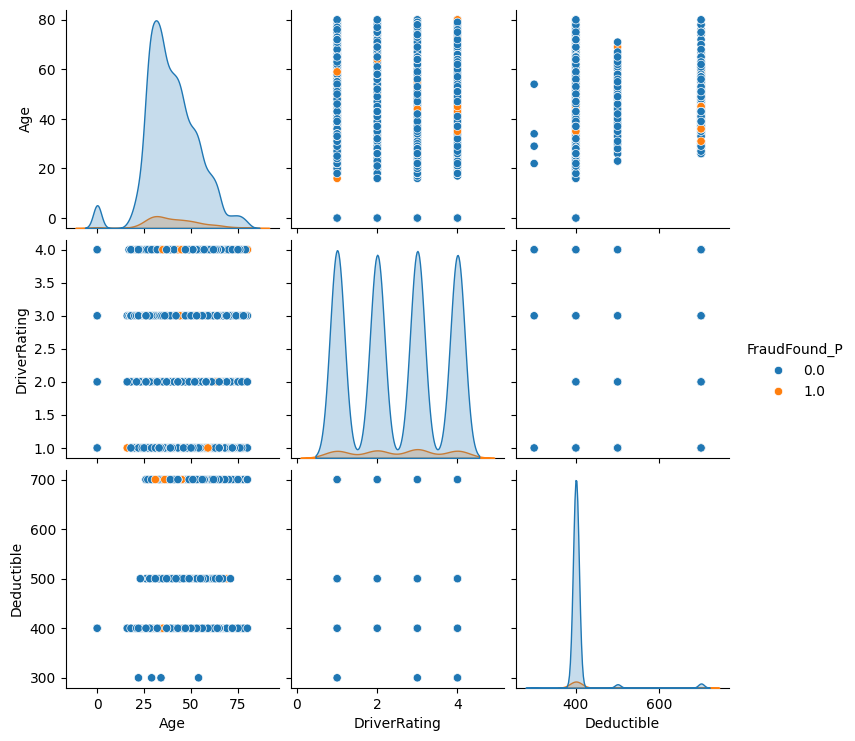

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn's pairplot for a subset of features including the target variable
sns.pairplot(data=temp_df[['Age', 'DriverRating', 'Deductible', 'FraudFound_P']], hue='FraudFound_P', diag_kind='kde')
plt.show()


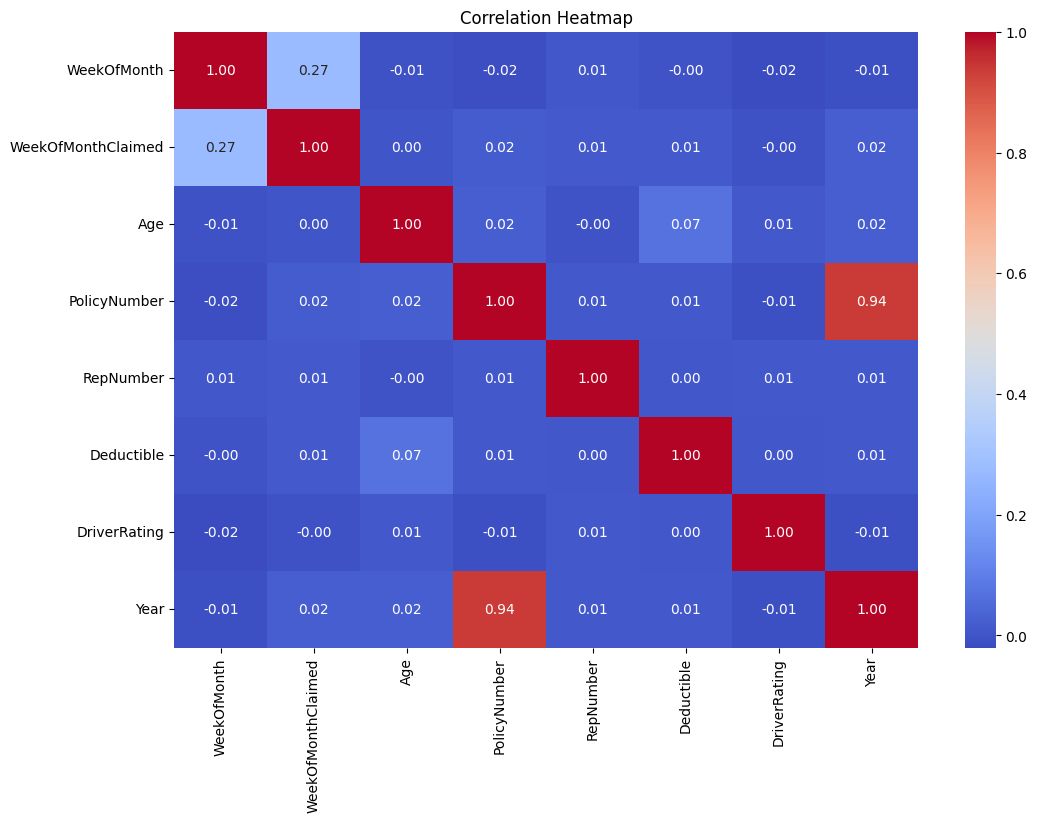

In [ ]:
# Calculate correlations
corr = X_train[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
